In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import random
import matplotlib.colors
import copy
%matplotlib inline

In [40]:
def update_distances(graph, x, y, distance, parent = None): 
    """Update the distances of the current node's neighbors"""
    dRow = [ -1, 0, 1, 0]
    dCol = [ 0, 1, 0, -1]
    neighbors = []
    
    for i in range(4):
        adjx = x + dRow[i]
        adjy = y + dCol[i]
        if (graph[adjx][adjy]==0):
            neighbors.append([adjx, adjy])
    
    for a, b in (neighbors):
        if distance[x][y] + weight < distance[a][b]:
            distance[a][b] = distance[x][y] + weight
            parent[a][b] = [x,y]

def pick_next_node(graph, distance, visited):
    """Pick the next univisited node at the smallest distance"""
    min_distance = float('inf')
    min_node = []
    for i in range(len(distance)):
        for j in range(len(distance)):
            if (graph[i][j]==0) and not visited[i][j] and distance[i][j] < min_distance:
                min_node.append([i, j]) 
                min_distance = distance[i][j]
    return min_node
        
def shortest_path(graph, sx, sy, destx, desty):
    """Find the length of the shortest path between source and destination"""
    visited = [[False for i in range (128)] for i in range (128)]
    distance = [[float("inf") for i in range (128)] for i in range (128)]
    global weight
    weight = 1
    parent = [[None for i in range (128)] for i in range (128)]
    queue = []
    idx = 0
    
    queue.append([sx, sy])
    distance[sx][sy] = 0
    visited[sx][sy] = True
    
    while idx < len(queue) and not visited[destx][desty]:
        currentx, currenty = queue[idx]
        update_distances(graph, currentx, currenty, distance, parent) #, parent
        
        next_node = pick_next_node(graph, distance, visited)
        if next_node is not None:
            next_nodex, next_nodey = next_node[0]
            visited[next_nodex][next_nodey] = True
            queue.append([next_nodex, next_nodey])
        idx += 1
    
    path = []
    current = [destx, desty]
    while current != [sx, sy]:
        currentx , currenty = current[0], current[1]
        next = parent[currentx][currenty]
        path.append(next)
        current = next     
        
    return distance[destx][desty], path, visited 

In [42]:
def save_animation_video(grid, x,y,endx,endy):
    cp =copy.deepcopy(grid)
    dist, path, visited = shortest_path(grid, x, y, endx, endy)
    count=0
    for i in range (len(visited)):
        for j in range (len(visited)):
            if visited[i][j]== True:
                count+=1
    print(count)
    xx,yy = path[-2]
    cp[xx][yy] = 2
    result = np.array(path)
    print(dist)
    
    
    fig = plt.figure( figsize=(10,10) )
    cmap = matplotlib.colors.ListedColormap(["white", "black",'red'])
    fps = 50

    grid1=[]

    for i in range (len(path)):
        x, y = path[i]
        cp[x][y] = 2
        m = copy.deepcopy(cp)
        grid1.append(m)
#     print(grid1[-3]==grid[-1])
        
    im = plt.imshow(grid1[0], cmap=cmap)
#     print(grid1[-1])

    def animate_func (i):
        if i % fps ==0:
            print('.', end=' ')
        im.set_array(grid1[i])
        return [im]

    anim = animation.FuncAnimation(fig, animate_func, frames=len(path), interval=10)
    anim.save('djikstra1.mp4')
    print("End")

In [43]:
# This will import the grids
import numpy as np
grid20= np.loadtxt("grid20.txt", dtype= int)
grid20 = grid20.tolist()
grid30= np.loadtxt("grid30.txt", dtype= int)
grid30 = grid30.tolist()
grid35= np.loadtxt("grid.txt", dtype= int)
grid35 = grid35.tolist()

In [ ]:
# Run this code to plot the graph
_, _, visited3 = shortest_path(grid1,2,2,125,125)
_, _, visited1 = shortest_path(grid20, 2,2,125,125)
_,_, visited2 = shortest_path(grid30, 2,2,125,125)
count1 =0
for i in range(len(visited1)):
    for j in range(len(visited1)):
        if visited1[i][j]== True:
            count1+=1
count2= 0
for i in range(len(visited2)):
    for j in range(len(visited2)):
        if visited2[i][j]== True:
            count2+=1
count3= 0
for i in range(len(visited3)):
    for j in range(len(visited3)):
        if visited3[i][j]== True:
            count3+=1

y1 = [count1, count2, count3]
x= [20,30,35]
fig, ax = plt.subplots()
ax.bar(x, y1, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel("% obstacle grid")
plt.ylabel("Iteration")
plt.show()
plt.savefig("Djikstra_plot.png")

12057
246
. . . . . . End


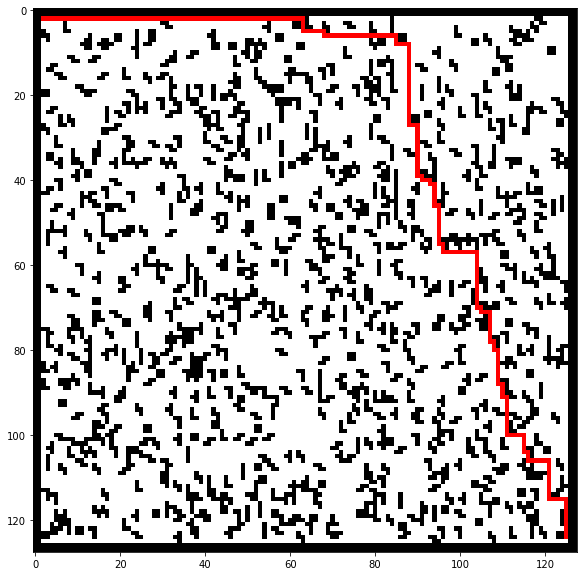

In [44]:
save_animation_video(grid1, 2,2,125,125)